In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
# Load the Auto-mpg dataset
auto_data = pd.read_csv('new auto.csv')
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,2009,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2009,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2009,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2009,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2009,1,ford torino


In [37]:
print(auto_data.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'model year', 'origin'],
      dtype='object')


In [43]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 21.6 KB


In [54]:
auto_data ['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [55]:
import statsmodels.formula.api as smf

In [57]:
test1=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',auto_data).fit()

In [58]:
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     165.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.42e-103
Time:                        05:06:50   Log-Likelihood:                -1111.3
No. Observations:                 392   AIC:                             2237.
Df Residuals:                     385   BIC:                             2264.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.2893      2.706     15.995      0.000      37.968      48.611
cylinders       -0.5659      0.404     -1.401      0.162      -1.360       0.228
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0621      0.017     -3.700      0.000      -0.095      -0.029
weight          -0.0049      0.001     -6.055      0.000      -0.006      -0.003
acceleration    -0.0335      0.123     -0.272      0.785      -0.276       0.209
origin           1.4668      0.347      4.221      0.000       0.784       2.150
==============================================================================
Omnibus:                       32.228   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.172
Skew:                           0.619   Prob(JB):                     4.22e-10
Kurtosis:                       4.053   Cond. No.                     4.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,2012.556122,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,2.325641,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,2009.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,2010.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,2013.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,2014.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,2017.000000,3.000000


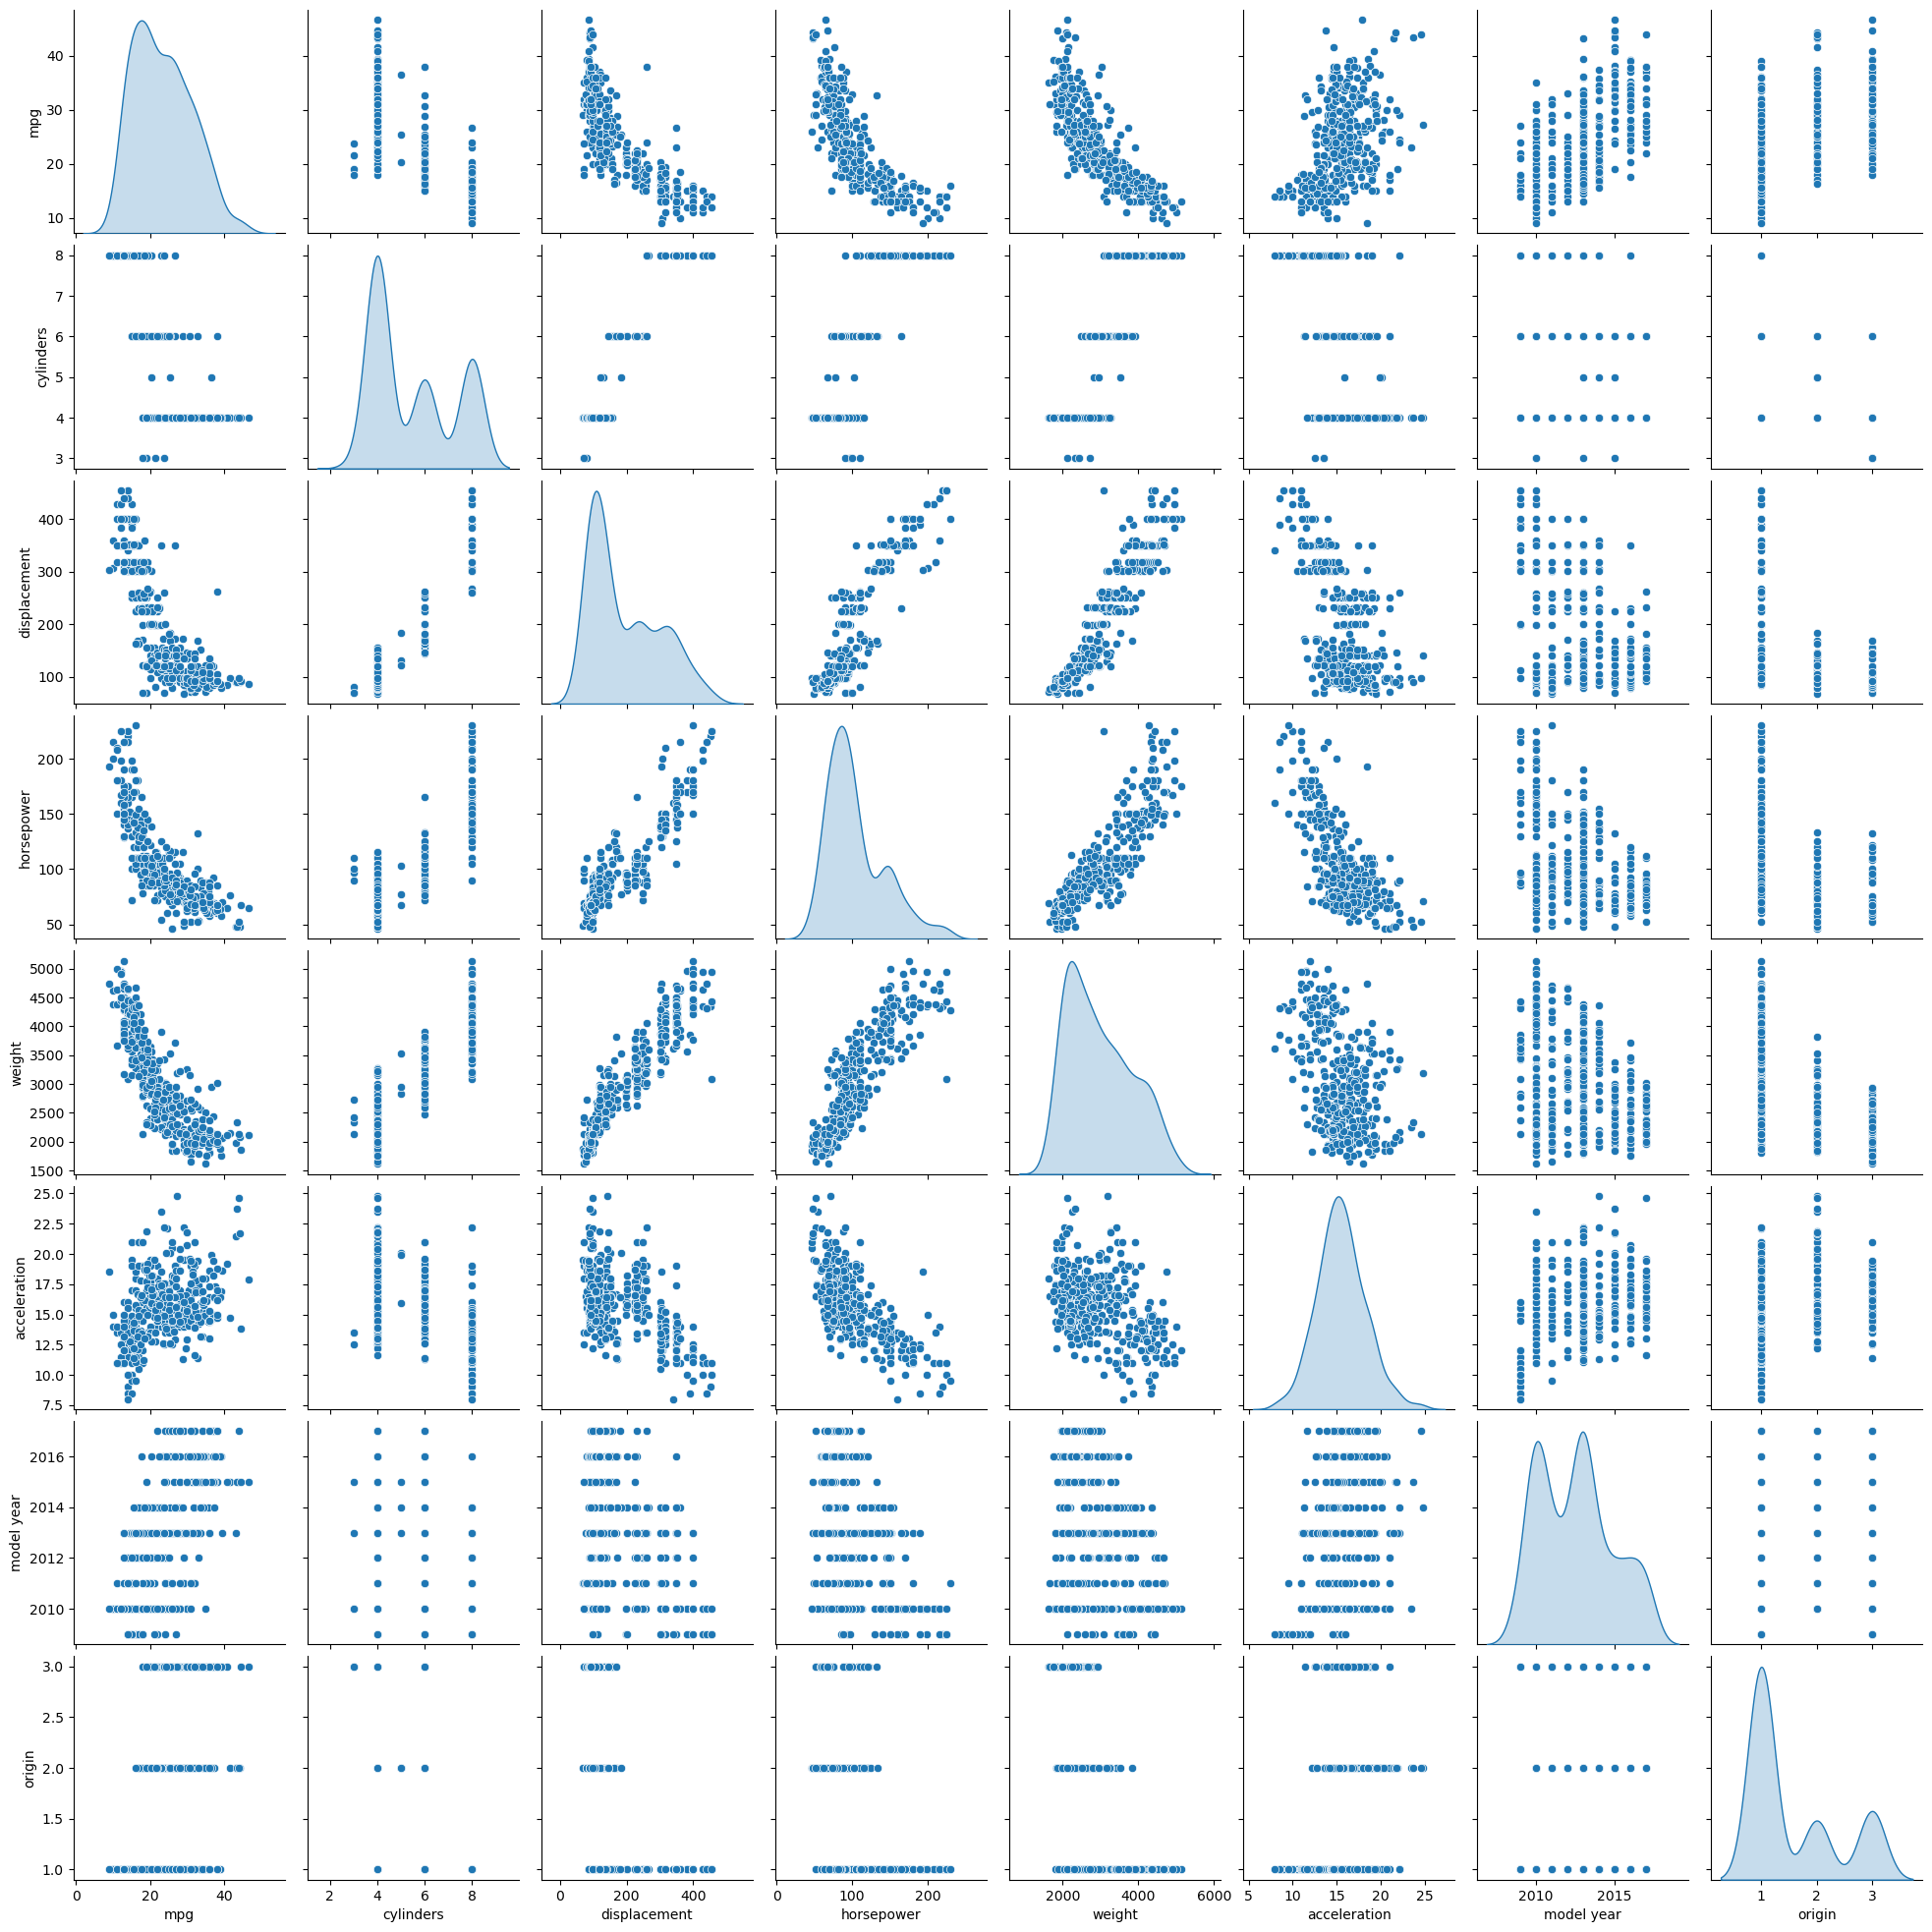

In [53]:
sns.pairplot(auto_data,diag_kind='kde')
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(auto_data.drop('mpg', axis=1),
                                                    auto_data['mpg'],
                                                    test_size=0.2,
                                                    random_state=42)

In [33]:
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [38]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Compute R2 score
r2 = r2_score(y_test, y_pred)

# Print R2 score
print('R-squared:', r2)

R-squared: 0.684179884261763


In [41]:
# Input features for a new data point
new_data = pd.DataFrame({'cylinders': [8],
                         'displacement': [307.0],
                         'horsepower': [130],
                         'weight': [3504],
                         'model year': [2009],
                         'origin': [1]})

In [42]:
# Make prediction using the model
prediction = model.predict(new_data)

# Print prediction
print('Predicted mpg:', prediction)

Predicted mpg: [13.60416667]
